In [14]:
import pandas as pd 
import plotly.express as px 

In [15]:
df = pd.read_csv('avocado-updated-2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [17]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


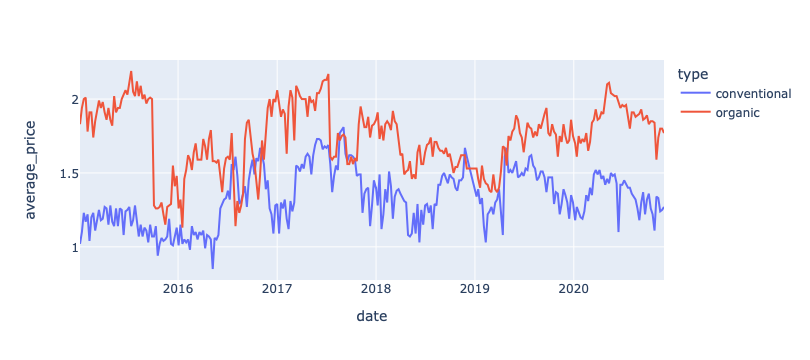

In [16]:
fig = df['geography'] == 'Boston'
px.line(df[fig] , x= 'date' , y='average_price',color ='type')

In [11]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.3 MB/s eta 0:00:0000:0100:01


In [12]:
from jupyter_dash import JupyterDash
import dash_html_components as html 
import dash_core_components as dcc
from dash.dependencies import Input, Output


/var/folders/n8/r2m8scgs7nz1tssk9k6d_vlh0000gn/T/ipykernel_71083/3699183171.py:2: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

/var/folders/n8/r2m8scgs7nz1tssk9k6d_vlh0000gn/T/ipykernel_71083/3699183171.py:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`



In [59]:
app = JupyterDash()

colors = {
    'background': 'lightpink',
    'text': 'blue'
}





app.layout = html.Div(style={'backgroundColor': colors['background']}, 
                      children = [
    html.H1('avocado', style={
            'textAlign': 'center',
            'color': colors['text']
        }),
    
    
    
    html.P('25-1', style={
           'textAlign': 'center',
           'color': colors['text'],
    
    
        }),
    
    dcc.Dropdown(id='my-drop',
                options=[{'label':i ,'value':i} 
                         for i in df['geography'].unique()]
               
                
                ),
  
    dcc.Graph(id='my-graph')
])
@app.callback(
Output('my-graph', 'figure'),
Input('my-drop','value')
)
def update_graph(selected_geography):
    fillter_df = df[df['geography']==selected_geography ]
    line_chart = px.line(fillter_df , x='date' , y='average_price' , color='type')
    
    return line_chart


if __name__ == '__main__':
    app.run_server()

Dash app running on http://127.0.0.1:8050/
